In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.random.random((100,2))
X = 2 * X -1

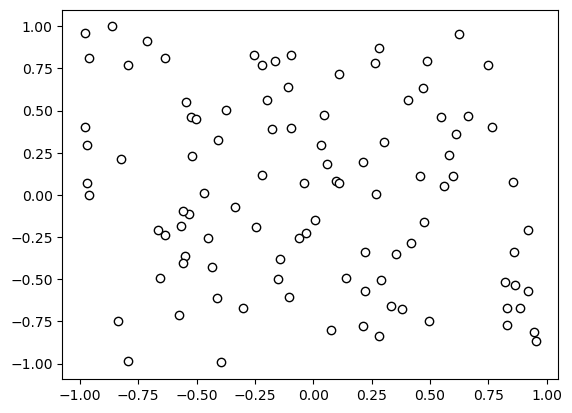

In [3]:
plt.scatter(X[:,0], X[:,1], c='w', edgecolors='k')
plt.show()

In [4]:
N = len(X)
Y = np.zeros(N, 'd')
for k in range(N):
    Xk = X[k]
    z = Xk[0] - Xk[1]
    if z > 0:
        Y[k] = +1.0
        X[k,0] += 0.25
        X[k,1] -= 0.25
    else:
        Y[k] = -1.0
        X[k,0] -= 0.25
        X[k,1] += 0.25
        

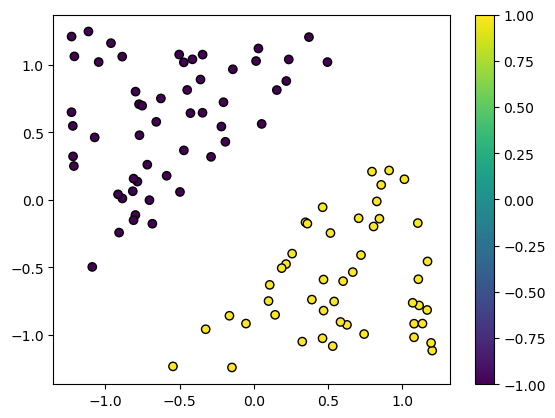

In [5]:
cs = plt.scatter(X[:,0], X[:,1], c=Y, edgecolors='k')
plt.colorbar(cs)
plt.show()

In [6]:
import mltools.funcs as funcs
import mltools.lossfuncs as lossfuncs
import mltools.models as models
import mltools.gda as gda
import mltools.risks as risks
import mltools.aggfuncs as aggfuncs

In [7]:
hinge_func = funcs.Hinge()
loss_func = lossfuncs.MarginLoss(hinge_func)
linmod = models.LinearModel(2, np.random.random(3))
risk = risks.Risk(linmod, loss_func)

In [8]:
gd = gda.GradientDescent(risk, h=0.05)
gd.fit(X, Y)
plt.plot(gd.rvals)
plt.show()

In [10]:
def calc_zz(linmod, min_val=-1, max_val=1):
    xrange = np.linspace(min_val, max_val, 100)
    yrange = np.linspace(min_val, max_val, 100)
    XX, YY = np.meshgrid(xrange, yrange)
    XY = np.c_[XX.ravel(), YY.ravel()]
    ZZ = linmod.evaluate_all(XY)
    ZZ = ZZ.reshape(XX.shape)
    return ZZ

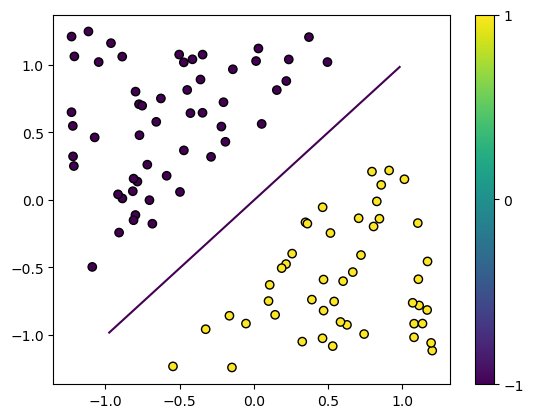

In [11]:
ZZ = calc_zz(linmod, -1, 1)
cs = plt.scatter(X[:,0], X[:,1], c=Y, edgecolors='k')
plt.colorbar(cs, ticks=[-1,0,1])
plt.contour(ZZ, levels=[0.], origin='lower', extent=(-1.,1.,-1.,1.))
plt.show()

In [22]:
X_o = np.array([
    [-1.8,0.2],
    [-1.5,0.1],
    [-1.7,0.3],
    [-1.6,0.0],
    [-1.7,0.1],
    [-1.8,0.3],
    [-1.5,0.3],
    [-1.6,0.0],
    #
    [1.8,0.2],
    [1.5,0.1],
    [1.6,0.3],
    [1.4,0.0],
    [1.8,0.0],
    [1.5,0.3],
    [1.4,0.2],
    [1.3,0.3],
])

Y_o = np.array([1.,1.,1.,1.,1.,1.,1.,1.,
                -1.,-1.,-1.,-1.,-1.,-1.,-1.,-1.,
               ])

Y2 = np.hstack((Y, Y_o))
X2 = np.vstack((X, X_o))
print(Y2[-10:], Y2.shape)
print(X2[-10:], X2.shape)

print(len(X) / len(X2))

[ 1.  1. -1. -1. -1. -1. -1. -1. -1. -1.] (116,)
[[-1.5  0.3]
 [-1.6  0. ]
 [ 1.8  0.2]
 [ 1.5  0.1]
 [ 1.6  0.3]
 [ 1.4  0. ]
 [ 1.8  0. ]
 [ 1.5  0.3]
 [ 1.4  0.2]
 [ 1.3  0.3]] (116, 2)
0.8620689655172413


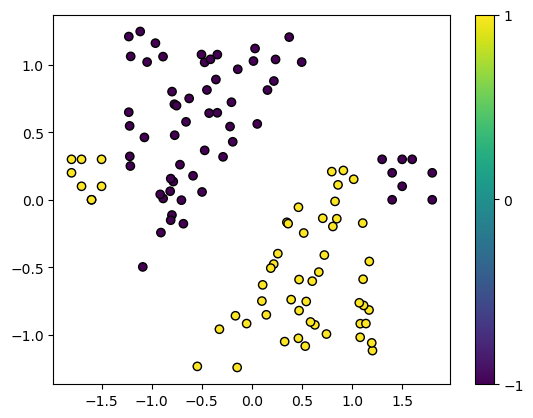

In [13]:
cs = plt.scatter(X2[:,0], X2[:,1], c=Y2, edgecolors='k')
plt.colorbar(cs, ticks=[-1,0,1])
plt.show()

In [14]:
linmod1 = models.LinearModel(2, np.random.random(3))
risk1 = risks.Risk(linmod1, loss_func)

In [15]:
gd1 = gda.GradientDescent(risk1, h=0.05)

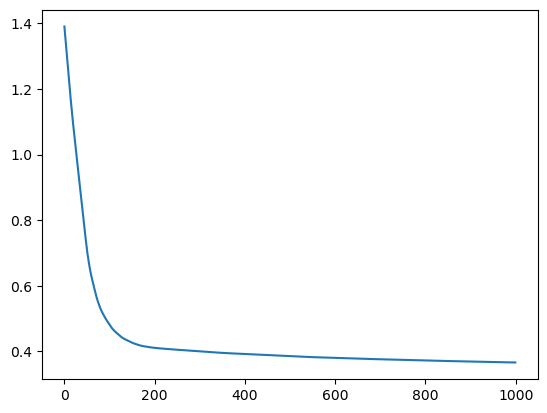

In [16]:
gd1.fit(X2, Y2)
plt.plot(gd1.rvals)
plt.show()

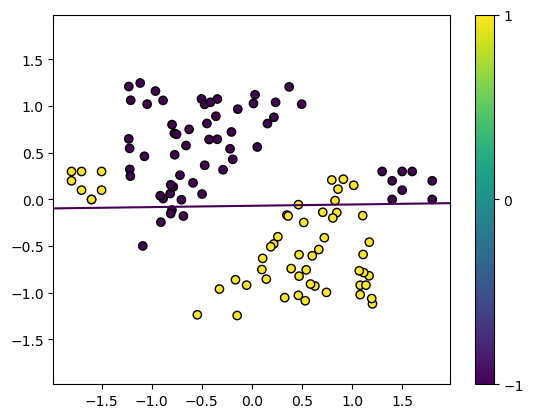

In [17]:
ZZ1 = calc_zz(linmod1, -2, 2)
cs = plt.scatter(X2[:,0], X2[:,1], c=Y2, edgecolors='k')
plt.colorbar(cs, ticks=[-1,0,1])
plt.contour(ZZ1, levels=[0.], origin='lower', extent=(-2.,2.,-2.,2.))
plt.show()

In [79]:
linmod2 = models.LinearModel(2, np.random.random(3))
rho_func = funcs.SoftQuantileFunc(
                funcs.SoftAbs(0.001), 
                0.85)
aggfunc = aggfuncs.WMMean(rho_func)
risk2 = risks.Risk2(linmod2, loss_func, aggfunc)

In [80]:
gd2 = gda.GradientDescent(risk2, h=0.05)

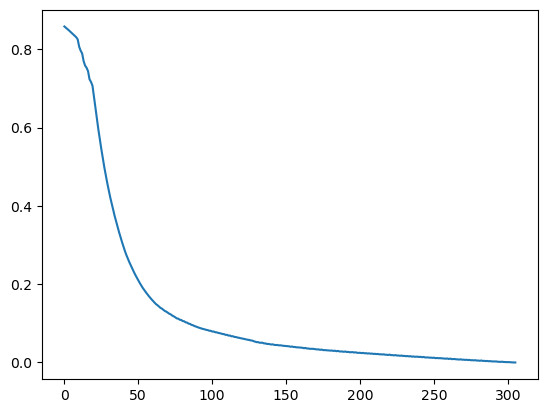

In [81]:
gd2.fit(X2, Y2)
plt.plot(gd2.rvals)
plt.show()

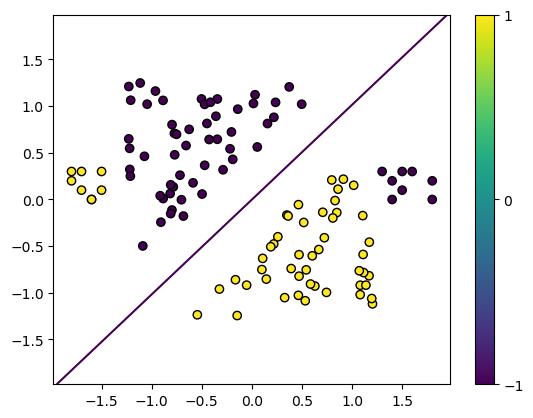

In [82]:
ZZ2 = calc_zz(linmod2, -2, 2)
cs = plt.scatter(X2[:,0], X2[:,1], c=Y2, edgecolors='k')
plt.colorbar(cs, ticks=[-1,0,1])
plt.contour(ZZ2, levels=[0.], origin='lower', extent=(-2.,2.,-2.,2.))
plt.show()